#### Предисловие

Во время работы над этим блокнотом я пользовался материалами из [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

Дополнительно я использую [шпаргалку](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) для работы с текстом Markdown

## Стадии рабочего процесса

1. Вопрос, определение проблемы;
2. Получение тренировочного и рабочего набора данных;
3. Обработка и очистка данных;
4. Анализ, определение паттернов и изучение данных;
5. Моделирование, предсказание и решение задачи;
6. Визуализация, составление отчета и презентация задачи, а также шагов её решения;
7. Предоставление результатов.

Это типичная схема рабочего процесса. Однако, могут быть нюансы, например:

* Некоторые шаги могут выполняться одновременно, например, анализ данных может происходить в процессе визуализации;
* Шаги могут повторяться несколько раз, например, визуализация может оказаться полезной многократно;
* Какие-то шаги могут идти раньше, чем обычно, например анализ данных может происходить до обработки;
* Какой-то шаг может быть опущен.

## Определение задачи
Типичная задача про Титаник

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

Или, переводя на русский язык:

> Зная из тренировочного набора примеров, описывающий выживших и погибших пассажиров в катастрофе Титанике, сможет ли наша модель определить, выживут ли пассажиры в тестовом наборе данных?

Суть происходящего:

* 15 апреля 1912 года во время своего первого круиза Титаник потонул, столкнувшись с айсбергом, убив 1502 человека из 2224. Базовый уровень выживаемости 32%
* Одной из причин гибели такого большого количества людей стала нехватка спасательных шлюпок.
* Несмотря на присутствие фактора удачи в выживании людей, некоторые группы людей имели больше шансов на спасение, например, женщины, дети и люди из высшего класса.

## Цели рабочего процесса

*это тоже стоит добавить в Anki*

**Классификация.** Мы можем иметь необходимость классифицировать или категоризировать наши тренировочные данные. Также может потребоваться осознать последствия или корреляцию разных классов с нашей целью прогнозирования.

**Корреляция.** Какие параметры вносят значительный вклад в целевую переменную (выживаемость)? Статистически говоря, существует ли [корреляция](https://en.wikiversity.org/wiki/Correlation) (*стоит сделать конспект, добавить карточку в Anki*) между независимыми и целевой переменными? Это работает как для численных, так и для категориальных переменных. Можно также заранее определить корреляции между независимыми переменными для последующих возможных задач.

**Конвертация.** Для стадии моделирования потребуется подготовить данные. Для некоторых методов потребуется преобразовать текстовые категориальные данные в числовые.

**Дополнение.** Подготовка данных также может подразумевать заполнение пропусков в данных. Модельные алгоритмы лучше работают в случаях, когда нет пропусков в данных.

**Корректировка.** Также может потребоваться изучить набор данных на предмет наличия ошибок и выбросов, которые могут значительно повлиять на результаты прогнозов. 

**Создание.** Можем ли мы создать новые переменные, основанные на старых, такие, чтобы они помогали нам достигать целей корреляции, конвертации и дополнения данных.

**Построение графиков.** Выбор правильного метода визуализации зависит от природы данных и целей нашего прогноза

In [1]:
# обработка информации
import pandas as pd
import numpy as np
import random as rnd  # впервые сталкиваюсь с этой библиотекой, изучить, добавить в Anki

# визуализация
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# функции из sklearn для машинного обучения, все изучить, законспектировать и добавить в Anki
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

## Получение данных
Загружаем данные и объединяем их в один датафрейм

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

## Анализ через описание данных

** Какие переменные вообще есть в наборе данных?**

In [3]:
print(train_df.columns.values) # опять же, я не умел раньше обращаться вот так к значениям в методе columns

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


**Какие переменные являются категориальными?**

Категориальные переменные бывают номинальными, порядковыми (ordinal), соотношениями или интервальными. Размышления об этом позволяют строить правильные графики

* Категориальные: Survived, Sex, Emarked. Порядковой при этом будет: PClass

**Какие переменные численные?**

Численные переменные бывают непрерывными, дискретными и временным рядом. Аналогично, понимание данных помогает принять решение о правильной визуализации.

* Непрерывные: Age, Fare. Дискретные: SibSp, Parch

In [4]:
# посмотрим на данные
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Какие переменные обладают смешанным типом данных?**

Это важно понимать, чтобы не совершить ошибку (<span style="color:red">какую?</span>). В нашем наборе данных:

* Ticket является смесью численных и численно-буквенных данных. Cabin содержит численно-буквенные данные

**Какие переменные могут содержать ошибки или опечатки?**

Этот вопрос сложно задавать применительно к большим наборам данных, однако несколько примеров из небольшого набора могут сразу же сказать, какие переменные потребуют корректировки.

* Переменная Name может содержать ошибки или опечатки, поскольку есть несколько способов указать имя, включая титулы и звания, круглые скобки, цитирование и так далее.

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Какие переменные содержать пустые значения?**

Это потребует корректировки.

* Cabin > Age > Embarked содержат некоторое количество пустых значений в таком порядке тренировочного набора данных.
* Cabin > Age неполны в тестовом наборе данных

**Каковы типы данных для разных переменных?**

Это поможет нам во время конвертации

* Семь переменных являются целыми или числами с плавающей точкой. Шесть в случае тестового набора данных
* Пять переменных являются строковыми (object)

In [6]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

**Каково распределение значений численных переменных по данным?**

Это поможет нам определить, насколько репрезентативен тренировочный набор даных по отношению к реальной области решения задачи.

* Общий объем выборки 891 или 40% общего количества пассажиров на Титанике (2224)
* Survived - категориальная переменная со значениями 0 и 1
* Около 38% из выборки выжили, реальная выживаемость 32%
* Большинство пассажиров (>75%) путешествовали без родителей или детей *(где это он разглядел?)*. 
* Примерно 30% пассажиров ехали с родственниками или супругами
* Стоимость билетов значительно различалась, несколько пассажиров (<1%) заплатили целых $512.
* Несколько очень пожилых пассажиров (<1%) в возрасте 65-80 лет.

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Каково распределение категориальных переменных?**

* Имена уникальны по всему объему выборки
* 65% мужчин
* В переменной Cabin (каюта) есть несколько дубликатов. Очевидно некоторые пассажиры путешествовали в одной каюте.
* Переменная Embarked имеет три возможных пункта назначения для пассажиров, большинство ехали в S.
* У переменной Ticket большое количество дубликатов 22% (unique=681)

In [8]:
train_df.describe(include=['O'])  # Не знаю такого метода в этой функции

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Healy, Miss. Hanora ""Nora""",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


**Предположения построенные на анализе данных**

Из проведенного выше анализа уже можно сделать некоторые предположения, которые впоследствии можно будет скорректировать прежде чем предпринимать активные действия.

**Корреляция**
Нам бы хотелось знать, насколько каждый из независимых признаков коррелирует с Survival. Мы хотим выяснить это на ранней стадии проекта и затем сравнивать эти корреляции со полученными моделями в дальнейшем.

**Дополнение**
1. Возможно нам потребуется дополнить Age, поскольку она совершенно точно связана с Survival
2. Также возможно нам потребуется дополнить Embarked, поскольку она может коррелировать с выживаемостью.

**Исправление**
1. Переменная Ticket (билет) может быть выброшена из нашего анализа, поскольку она содержит большое количество дубликатов (22%) и вероятно не будет корреляции между номером билета и выживаемостью.
2. Переменная Cabin (каюта)　также может быть выброшена из рассмотрения, поскольку она содержит множество нулевых значений как в тренировочном, так и в тестовом наборе данных.
3. PassengerId может быть отброшена, поскольку нет вклада в выживаемость
4. Переменная Name не дает напрямую вклада в выживаемость, поэтому может быть отброшена.

**Создание**
1. Нам может потребоваться создать новую переменную под названием Family, основанную на Parch и SibSp, чтобы получить общее количество членов семей на борту.
2. Нам потребуется обработать переменную Name, чтобы достать значение статуса пассажира (Title) в качестве новой переменной
3. Возможно потребуется создать порядковую категориальную переменную из Age.
4. Также стоит создать переменную Fare по диапазонам стоимости билетов.

**Классификация**

Также нужно добавить к нашим предположениям, основываясь на описании задачи
1. Женщины (Sex=female) выживуют с большей вероятностью.
2. Дети (Age<?) также выживут с большей вероятностью.
3. Пассажиры первого класса (Pclass=1) выживут с большей вероятностью.

## Анализ через группировку по признакам
Чтобы проверить некоторые из наших наблюдений и предположений, мы можем быстро проанализировать связи между признаками, сгруппировав одни относительно других.  На этой стадии мы можем провернуть такую процедуру для признаков, у которых нет пустых значений. Также есть смысл делать это только для прищнаков, которые являются категориальными (Sex), порядковыми (Pclass) или дискретными (SibSP, Parch). 

* __Pclass.__ Можно наблюдать большую корреляцию (>0.5) между Pclass=1 и Survived. Решаем оставить этот признак в нашей модели.
* __Sex.__ Действительно, женщины имеют высокую выживаемость (74%)
* __SibSP и Parch.__ Для этих переменных потребуется создать дополнительную переменную или набор переменных (создание №1)

In [9]:
# вот эту строчку тоже разобрать, добавить в Anki в качестве примеров
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Анализ через визуализацию данных
__Сравниваем численные признаки__
Начнем с выяснения отношений между численными признаками и нашей целевой переменной (Survival)

Гистограмма в этом случае очень полезна, позволяет сравнить непрерывные переменные типа возраста. Таким образом мы можем ответить на вопросы, касающиеся некоторых групп возрастов, например, более ли вероятно выживание для маленьких детей.

Обратите внимание, что ось Oy отражает количество элементов в выборке по определенному возрасту или пассажиров.

__Наблюдения__

* Младенцы (Age<=4) имеют высокий уровень выживаемости
* Самые пожилые пассажиры (Age=80) выжили.
* Большая часть пассажиров 15-25 лет не выжили.
* Большая часть пассажиров приходится на диапазон 15-35 лет.

__Решения__

Этот простой анализ подтверждает наши предположения для дальнейших стадий работы.

* Мы должны включить возраст (Age) в нашу модель (предположение классификации №2)
* Придется дополнить переменную Age, закрыв нулевые значения (дополнение №1)
* Нужно будет создать группы по возрастам (создание №3)

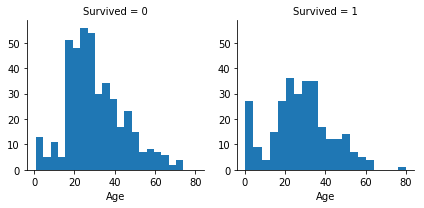

In [13]:
g = sns.FacetGrid(train_df, col='Survived')  # Не знаю такой функции, добавить в Anki
g.map(plt.hist, 'Age', bins=20)

__Сопоставление численных и порядковых переменных__

Мы можем использовать несколько переменных для определния связей на одном графике. Это может быть сделано для численных и категориальных признаков, которые имеют числовые выражения.

__Наблюдения__

* Pclass=3 содержит наибольшее количество пассажиров, однако большинство не выжили. 
* Пассажиры-младенцы из Pclass=2 и Pclass=3 большей частью выжили.
* Большинство пассажиров из Pclass=1 выжили. Подтверждает наше предположение по классификации №3
* Pclass имеет вариантивность в отношении распределения возрастов пассажиров.

__Решения__

* Добавить Pclass в нашу модель.

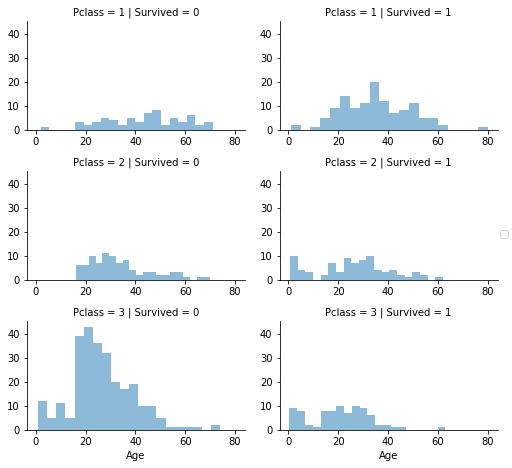

In [14]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

__Сопоставление категориальных переменных__

__Наблюдения__

* Женщины выживают гораздо чаще мужчин.
* Существует исключение с Embarked=C, где мужчины имеют больший уровень выживаемости. Это может быть корреляцией между Pclass и Embarked, а впоследствии между Pclass и целевой переменной, а не прямой связью между Embarked и Survived
* Порты отправления имеют переменные уровни выживаемости для Pclass=3 и среди пассажиров-мужчин.

__Решения__

* Добавить пол в прогностическую модель.
* Дополнить и добавить переменную Embarked в прогностическую модель.

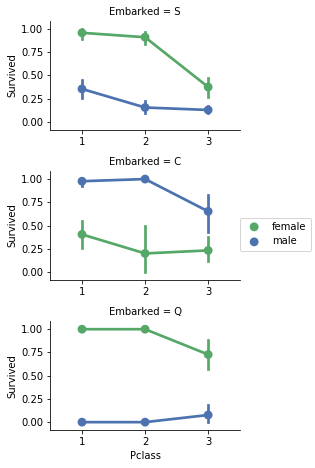

In [15]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

__Сопоставление категориальных и численных переменных__

Мы можем также захотеть сопоставить категориальные переменные (с нечисловыми значениями) и численные переменные. Можно рассмотреть связь между Embarked (категориальная нечисловая переменная), Sex (категориальная нечисловая), Fare (стоимость, числовая непрерывная переменная) с Survived

__Наблюдения__

* Пассажиры, купившие более дорогие билеты имели больше шансов на выживание. Подтверждает наше предположение сделать стратификацию по диапазонам стоимости билетов.
* Порт отправления связан с уровнем выживания.

__Решения__

* Сделать группы по стоимости билетов.

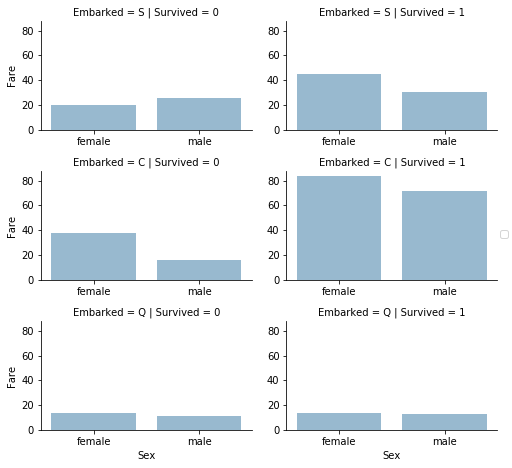

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare', alpha=0.5, ci=None)
grid.add_legend()

## Обработка данных

Собралось несколько предположений и решений относительно наших наборов данных и требований к решению. Пока нам не требовалось видоизменять какие-либо переменные, чтобы прийти к нашим выводам. Теперь будем реализовывать наши решения и предположения по корректированию, созданию и дополнению признаков.

__Исправление путем удаления признаков.__

Это будет хорошим способом начать. Удаляя признаки мы будем иметь дело с меньшим количеством единиц данных. Это ускорит наш ноутбук и облегчит анализ.

Основываясь на предположениях и решениях мы хотим избавиться от Cabin (каюта) и Ticket (билет).

Обратить внимание, что там, где это возможно, мы выполняем операции одновременно на тренировочном и тестовом наборах данных.

In [17]:
print('Before:', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
combine = [train_df, test_df]

print('After:', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before: (891, 12) (418, 11) (891, 12) (418, 11)
After: (891, 10) (418, 9) (891, 10) (418, 9)


__Создание новых признаков через извлечение данных из существующих__

Проанализируем признак Name на предмет возможности извлечения титулов и протестируем, есть ли связь между званиями (титулами) и выживаемостью, перед тем как отбросить переменные Name и PassengerId.

В следующем ниже коде мы извлекаем признак Title, используя регулярные выражения. Шаблон RegEx `(\w+\.)` достает первое слово, которое заканчивается точкой внутри переменной Name. Флаг `expand=False` возвращает объект DataFrame

__Наблюдения__

Когда мы строим на грфике Title, Age и Survived, мы обнаруживаем следующее.
* Большинство званий группируются по возрасту довольно хорошо. Например, титул Master имеет средний возраст в 5 лет.
* Некоторые звания в основном выживают (Mme, Lady, Sir) или нет (Don, Rev, Jonkheer).

__Решение__

* Сохраняем переменную Title для прогностической модели

In [18]:
for dataset in combine:
    # разобраться в этой строчке, добавить в Anki
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# новая, неизвестная мне функция
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Заменим некоторые титулы повсеместно используемыми аналогами или классифицируем их как редкие (`Rare`)

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess',\
            'Don','Dr','Jonkheer','Lady','Major','Rev','Sir','Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Можно сконвертировать категориальные переменные в порядковые

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs":3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Теперь можно безопасно избавить от переменной Name из тренировочного и тестового набора данных. Также нам не потребуется PassengerId из тренировочного набора данных

In [21]:
train_df = train_df.drop(['Name','PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
print(train_df.shape, test_df.shape)

(891, 9) (418, 9)


__Конвертация категориального признака__

Теперь можно конвертировать переменные, которые содержат строки в числовые переменные. Это требуется большинством алгоритмов. Это также позволит нам проще заполнять пропуски в данных.

Начнем с конвертации признака Sex в признак, где female=1, а male=0

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({"female": 1, "male": 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


__Дополнение числового непрерывного признака__

Теперь нужно начать оценивать и дополнять признаки пропущенными или нулевыми значениями. Сначала сделаем это с Age.

Рассмотрим три метода заполнения непрерывного численного признака.
1. Простой способ создавать случайные числа между средним и среднеквадратическими отклонениями.
2. Более точный способ угадать пропущенные значения - использовать другие связанные признаки. В нашем случае мы замечаем связи между Age, Gender и Pclass.  Поэтому можно угадывать значения Age, используя медианные значения для Age по наборам разных комбинаций Pclass и Gender. Таким образом, выбираем медианный возраст для первого класса и женщин, первого класса и мужчин и так далее.
3. Сочетать методы 1 и 2. Вместо прогнозирования возрастов, в зависимости от медианного возраста, использовать случайные числа между средним и среднеквадратическим отклонением для разных наборов Pclass и Gender

Методы 1 и 3 добавят в нашу модель случайный шум. Это может привести к разным непредсказуемым последствиям. Мы предпочтем метод 2.

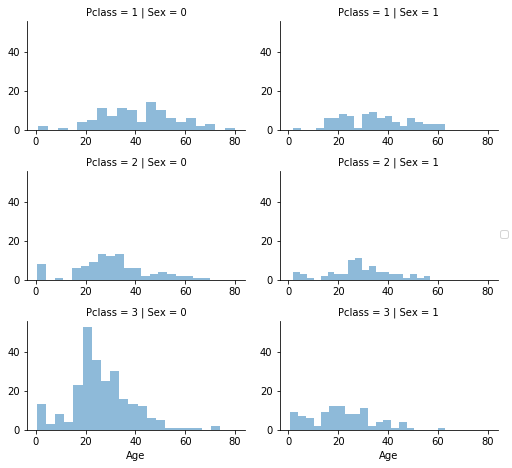

In [23]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist,'Age', alpha=0.5, bins=20)
grid.add_legend()

Начнем с создания пустого массива, который впоследствии будет содержать значения Age, спрогнозированные на основании комбинаций Pclass и Gender

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

Теперь пройдемся по разным сочетаниям Sex и Pclass и вычислим предполагаемые значения Age для шести комбинаций

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                              (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), \
                       'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Теперь создадим несколько групп возрастов AgeBand и определим корреляцию этого созданного признака с Survived

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Заменим переменную Age порядковым признаков, основываясь на группировке, сделанной выше

In [27]:
for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age'] = 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=32),'Age'] = 1
    dataset.loc[(dataset['Age']>32) & (dataset['Age']<=48),'Age'] = 2
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<=64),'Age'] = 3
    dataset.loc[dataset['Age']>64,'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Теперь можно удалить переменную AgeBand за ненадобностью

In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


__Создание нового признака, комбинируя существующие признаки__

Мы можем создать новую переменную FamilySize (размер семьи), которая будет комбинировать переменные Parch (родитель/ребенок) и SibSp (родственник/супруг). Это позволит выбросить впоследствии Parch и SibSp из наших наборов данных.

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize','Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Мы можем создать переменную IsAlone (в одиночестве) и посмотреть, как она коррелирует с выживаемостью.

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    
train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Выбросим переменные Parch, SibSp и FamilySize, оставив только IsAlone

In [31]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'], axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Также можно создать искусственный признак, комбинируя Pclass и Age

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
    
train_df.loc[:, ['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


__Дополняем категориальную переменную__

Переменная Embarked принимает значения S, Q, C в зависимости от порта назначения. Наш тренировочный набор данных имеет в этой колонке два пропущенных значения. Мы просто заполним эти пропуски при помощи самого частого порта назначения.

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


__Конвертация категориального признака в численный__

Здесь всё достаточно очевидно, мы заменяем буквенные значения категории числами.

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1,'Q':2}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


__Быстрое заполнение и конвертация численного признака__

Теперь можно дополнить единственное пропущенное значение переменной Fare, используя медиану по колонке. 

Обрати внимание, что мы не создаем дополнительных промежуточных переменных и не проводим сложного анализа, чтобы дополнить всего лишь одно пропущенное значение. Наша процедура заполнения пропусков в данном случае имеет тлько цель закрыть нулевые значения, чтобы моделирующий алгоритм мог работать.

Также можно округлить стоимость билета до двух знаков после запятой, поскольку она представляет стоимость.

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


Создадим группы в признаке Fare, создав новый признак FareBand

In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Сконвертируем признак Fare в порядковый категориальный признак, основываясь на границах, которые нам поставил FareBand

In [38]:
for dataset in combine:
    dataset.loc[dataset['Fare']<=7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare']>7.91) & (dataset['Fare']<=14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare']>14.454) & (dataset['Fare']<=31),'Fare'] = 2
    dataset.loc[dataset['Fare']>31,'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


Аналогично с тестовым набором данных

In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Моделируем, прогнозируем, решаем задачу.

Теперь мы в состоянии обучать наши модели и прогнозировать требуемое решение. Существуе более 60 моделирующих алгоритмов, из которых мы вольны выбирать. Необходимо понимать тип задачи и требования к решению, чтобы сузить выбор до нескольких моделей, которые мы сможем впоследствии оценивать. Наша задача относится к проблемам классификации и регрессии. Мы хотим определить связь между выходной переменной (Survived) и независимыми переменными. Также мы используем вид машинного обучения, который называется "обучение с учителем", поскольку мы обучаем нашу модель при помощи тренировочного набора данных. Учитывая эти два критерия - обучение с учителем и классификация и регрессия, мы можем сократить количество вариантов до следующих:

* Логистическая регрессия (Logistic Regression)
* К ближайших соседей (KNN, k-Nearest Neighbors)
* Метод опорных векторов (SVM, Support Vector Machines)
* Классификатор наивного Байеса (NB, Naive Bayes classifier)
* Дерево решений (Decision Tree)
* Случайный лес (Random Forest)
* Перцептрон (Perceptron)
* Искусственная нейронная сеть (Artificial neural network)
* Метод значимых векторов (?) (RVM, Relevance Vector Machine)

In [40]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Логистическая регрессия - полезная для применения в начале работы модель. Логистическая регрессия измеряет отношения между категориальной зависимой переменной и одной или несколькими независимыми переменными через оценку вероятностей, используя логистическую функцию. 

Обрати внимание на качество модели, созданной нашим тренировочным набором данных

In [41]:
# Логистическая регрессия

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)
acc_log

81.260000000000005

Мы можем использовать модель логистической регрессии для оценки наших предположений и решений во время создания переменных и заполнения пропусков. Эту оценку можно провести, рассчитав коэффициенты при независимых переменных в функции решения.

Положительные коэффициенты увеличивают логарифмические шансы (log-odds) отклика функции (таким образом, увеличивая вероятность), негативные коэффициенты уменьшают лог-шансы отклика (таким образом, уменьшая вероятность)

* Пол (Sex) имеент наивысший положительный коэффициент, то есть по мере увеличения переменной Sex (мужчины - 0, женщины - 1), вероятность того, что Survived = 1 увеличивается наибольшим образом.
* Наоборот, по мере увеличения Pclass, вероятность Survived = 1 уменьшается наибыстрейшим образом.
* Звание (Title) также подобрано хорошо, имея второй по величине положительный эффект на вероятности.

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns=['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.200978
5,Title,0.414362
4,Embarked,0.281026
6,IsAlone,0.262084
3,Fare,-0.022062
7,Age*Class,-0.085959
2,Age,-0.371647
0,Pclass,-1.083515


Дальше используем метод опорных векторов, который по набору тренировочных данных, где каждый элемент отмечен принадлежностью к одной из **двух категорий**, создает модель, которая назначает каждому новому элементу из тестового набора данных первую или вторую категорию. По сути это невероятностный двоичный линейный классификатор. Подробнее можно посмотреть [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine)

In [43]:
# Метод опорных векторов (Support Vector Machines)

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100, 2)
acc_svc

83.5

Среди алгоритмов, распознающих категории, метод "К ближайших соседей" является непараметрическим. Элемент классифицируется по большинству голосов его соседей, ему назначается класс наиболее часто встречающийся среди К его ближайших соседей (К - положительное целое число, обычно небольшое). Если К=1, то объекту просто назначается класс его ближайшего соседа.

In [44]:
# Метод к ближайших соседей (KNN, k-Nearest Neighbors)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

84.060000000000002

Классификаторы наивного Байеса - это семейство простых вероятностных классификаторов, основанных на применении теоремы Байеса с предположением (наивным) о независимости между признаками. Классификаторы наивного Байеса хорошо масштабируются. Ссылка на [Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)

In [45]:
# Гауссовый наивный Байес (Gaussian Naive Bayes)

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)
acc_gaussian

76.879999999999995

Перцептрон это алгоритм обучения с учителем бинарных классификаторов (функций, которые могут определить, может ли принадлежать объект, описываемый некоторым вектором тому или иному классу). Это тип линейного классификатора, т.е. алгоритм классификации, который делает свои прогнозы на основе линейной комбинации весов и признаков. Опять же ссылка на [Wikipedia](https://en.wikipedia.org/wiki/Perceptron)

In [46]:
# Перцептрон (Perceptron)

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100, 2)
acc_perceptron

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.790000000000006

In [47]:
# Линейный классификатор на опорных векторах (Linear SVC)

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100, 2)
acc_linear_svc

79.459999999999994

In [48]:
# Стохастический градиентный спуск (Stochastic Gradient Descent)

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)
acc_sgd

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


76.430000000000007

Деревья решений представлены в виде иерархических структур, где конечные точки (листья) представляют собой решения об отнесении элемента к некоторому классу, а промежуточные точки и ветви представляют собой решения относительно независимых признаков, направляющие классификатор к тому или иному "листку".

Дерево решений, где целевая переменная является непрерывной называются регрессионными деревьями. Подробнее в [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [49]:
# Дерево решений (Decision Tree)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)
acc_decision_tree

86.640000000000001

Случайные леса это ансабли из деревьев принятия решений, количество деревьев прописано в параметрах модели. При классификации возвращает самый частый класс, возвращаемый деревьями, при регрессии возвращает среднее значение, возвращаемое деревьями, входящими в ансамбль. Опять же, ссылка в [Wikipedia](https://en.wikipedia.org/wiki/Random_forest)

In [50]:
# Случайный лес (Random Forest)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train,Y_train)*100,2)
acc_random_forest

86.640000000000001

**Оценка моделей**

Теперь можно отранжировать модели и выбрать те, которые работают наилучшим образом. Несмотря на то, что и деревья принятия решений и случайные леса показали себя одинаково хорошо, выберем метод случайных лесов, поскольку он лучше справляется с проблемой переобучения на тренировочных данных

In [51]:
models = pd.DataFrame({
    'Models':['Support Vector Machines', 'KNN','Logistic Regression', 
              'Random Forest','Naive Bayes','Perceptron',
              'Stochastic Gradient Descent','Linear SVC', 'Decision Tree'],
    'Score':[acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian,
            acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree]
})
models.sort_values(by='Score',ascending=False)

,Models,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,84.06
0,Support Vector Machines,83.50
2,Logistic Regression,81.26
7,Linear SVC,79.46
5,Perceptron,78.79
4,Naive Bayes,76.88
6,Stochastic Gradient Descent,76.43


In [52]:
submission = pd.DataFrame({
    "PAssengerId": test_df["PassengerId"],
    "Survived": Y_pred
})
submission.to_csv('submission.csv')